# Generate images

chuyển chuyển chuyển chuyển chẳng chẳng chuyển chẳng chẳng


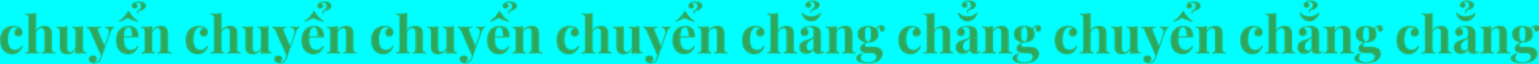

chuyển chẳng


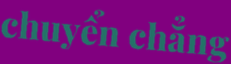

chuyển


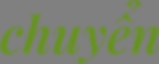

chuyển


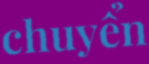

value of mean pixel is too similar. Ignore this image
resized_img_st 
 [9.836235766912257, 234.37223710649698, 142.42967180174145, 216.84058941728065]
background_img_st 
 [0.0, 128.0, 131.0]
Image is ignored
chẳng


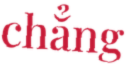

chẳng chuyển chẳng


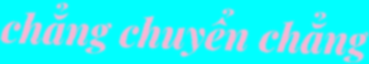

chẳng


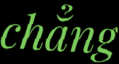

chuyển chuyển chuyển chẳng chẳng chẳng chẳng


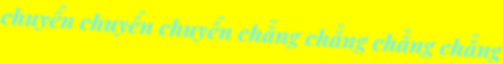

chuyển


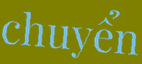

chuyển chuyển chẳng chẳng


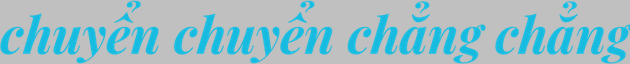

value of mean pixel is too similar. Ignore this image
resized_img_st 
 [118.20434183321846, 14.083046175051688, 38.784286698828396, 195.38318401102688]
background_img_st 
 [0.0, 128.0, 1.0]
Image is ignored
chẳng chẳng chuyển chẳng chuyển chuyển chuyển chuyển chẳng chuyển


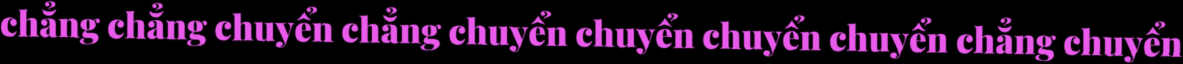

chẳng chuyển chuyển


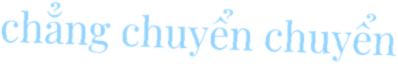

chẳng chẳng chẳng chẳng chẳng chẳng


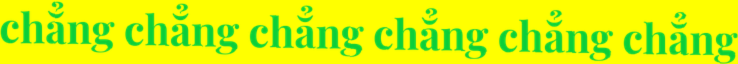

In [91]:
import os
from IPython.display import display
from trdg.generators import GeneratorFromDict

# The generators use the same arguments as the CLI, only as parameters
generator = GeneratorFromDict(
    count=15,
    length=10,
    allow_variable=True,
    language="curr",
    size=64,
    skewing_angle=5,
    random_skew=True,
    blur=2,
    random_blur=True,
    background_type=3,
    image_dir="trdg/images",
    # distorsion_type=1,
    # distorsion_orientation=2,
    text_color="#000000,#ffffff",
    path="tmp_words.txt",
    margins=(0, 0, 0, 0),
    fit=True,
)

count = 0
for img, lbl in generator:
    # Do something with the pillow images here.
    if img == None:
        print("Image is ignored")
    else:
    # img_name = f"undistorted_{count}.jpg"
    # img.save(os.path.join("undistorted_images", img_name))
    # with open("undistorted_labels.txt", "a") as f:
    #     f.write(f"{img_name}\t{lbl}\n")
    # imgs.append(img)
    # labels.append(lbl)
        count += 1
        print(lbl)
        display(img)


In [27]:
import os

len(os.listdir("trdg/fonts/curr"))

9

Note '' = "

# Generate backgrounds

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

color_names = [
    "Black",
    "White",
    "Red",
    "Lime",
    "Blue",
    "Yellow",
    "Cyan",
    "Magenta",
    "Silver",
    "Gray",
    "Maroon",
    "Olive",
    "Green",
    "Purple",
    "Teal",
    "Navy",
]
color_values = [
    [0, 0, 0],
    [255, 255, 255],
    [255, 0, 0],
    [0, 255, 0],
    [0, 0, 255],
    [255, 255, 0],
    [0, 255, 255],
    [255, 0, 255],
    [192, 192, 192],
    [128, 128, 128],
    [128, 0, 0],
    [128, 128, 0],
    [0, 128, 0],
    [128, 0, 128],
    [0, 128, 128],
    [0, 0, 128],
]
color_dict = {}
for i in range(len(color_names)):
    color_dict[color_names[i]] = color_values[i]
for name, value in color_dict.items():
    x = np.full((1000, 1000, 3), value, dtype=np.uint8)
    Image.fromarray(x).save(f"images/{name}.jpg")

In [ ]:
color_dict

# Filter images

In [ ]:
from PIL import Image
from IPython.display import display
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image_dir = "generated_text_recognition_dataset/undistorted_images"
image_names = os.listdir(image_dir)

In [ ]:
count = 0

In [ ]:
image = np.array(Image.open(os.path.join(image_dir, image_names[count])))
count += 1
X = image.reshape((-1, 3))
display(Image.fromarray(image))

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
label = kmeans.predict(X)
tmp = np.zeros_like(X)
for i in range(2):
    tmp[label == i] = kmeans.cluster_centers_[i]
tmp = tmp.reshape((image.shape[0], image.shape[1], image.shape[2]))
display(Image.fromarray(tmp))
print("Centers found by scikit-learn:\n", kmeans.cluster_centers_)
mean_pixel = kmeans.cluster_centers_.mean(axis=-1)
print("Mean pixel", mean_pixel)
print("Diff Mean pixel", np.absolute(mean_pixel[0] - mean_pixel[1]))
diff_channel = np.absolute(kmeans.cluster_centers_[0] - kmeans.cluster_centers_[1])
print("max diff channel", np.max(diff_channel))

In [ ]:
count -= 2

# Fix word dict

In [1]:
import os
import re

In [11]:
# concat all files into larger one
name = "train27"
path = f"vntc_dataset/{name}"

lines = []
for file in os.listdir(path):
    with open(os.path.join(path, file), "r", encoding="utf-16le", errors="ignore") as f:
        tmp = f.readlines()
    lines += tmp
with open(f"{path}.txt", "w", encoding="utf-8") as f:
    f.writelines(lines)

In [1]:
path = "trdg/dicts/vi.txt"
with open(path, "r") as f:
    lines = f.readlines()
with open("base_dict.txt", "r") as f:
    base_dict = f.readlines()
base_dict = [line.replace("\n", "") for line in base_dict]

In [5]:
def remove_spaces_in_quotes(text):
    # This regex finds text within quotes and removes leading/trailing spaces
    text = re.sub(r'"\s*(.*?)\s*"', r'"\1"', text)
    text = re.sub(r"'\s*(.*?)\s*'", r"'\1'", text)
    return text


def remove_spaces_before_punctuation(text):
    # Define the punctuation marks
    punctuation = r"!%)}];:,.?"
    # Use regex to remove spaces before the punctuation marks
    return re.sub(r"\s+([" + re.escape(punctuation) + "])", r"\1", text)


def remove_spaces_after_characters(text):
    # Define the characters
    characters = r"\(\{\["
    # Use regex to remove spaces after the characters
    return re.sub(r"([" + re.escape(characters) + r"])\s+", r"\1", text)


def remove_spaces_around_slash(text):
    # Use regex to remove spaces before and after the "/"
    return re.sub(r"\s*/\s*", "/", text)


def remove_unwanted_chars(text, char_dict):
    text = "".join(char for char in text if char in char_dict)
    return text


def process_text(text):
    text = text.strip()
    # text = text.replace("_", " ")
    # text = remove_spaces_in_quotes(text)
    # text = remove_spaces_before_punctuation(text)
    # text = remove_spaces_after_characters(text)
    # text = remove_spaces_around_slash(text)
    text = remove_unwanted_chars(text, base_dict)
    return text


lines = [process_text(line) for line in lines]
lines = [line for line in lines if len(line) > 0]

In [ ]:
lines

In [7]:
def get_char_dict(lines):
    text = "".join(lines)
    return sorted(list(set(text)))


char_dict = get_char_dict(lines)
print(set(base_dict) - set(char_dict))
print(set(char_dict) - set(base_dict))

{'|', 'Ỵ'}
set()


In [8]:
def get_words(lines):
    text = " ".join(lines)
    word_list = text.split(" ")
    word_set = set(word_list)
    word_list = sorted(list(word_set))
    if len(word_list[0]) == 0:
        return word_list[1:]
    else:
        return word_list


words = get_words(lines)

In [9]:
with open("trdg/dicts/vi.txt", "w") as f:
    for word in words:
        f.write(word + "\n")

In [13]:
lines = []

with open("all_words.txt", "r") as f:
    tmp = f.readlines()
lines += tmp
with open("trdg/dicts/vi.txt", "r") as f:
    tmp = f.readlines()
lines += tmp
with open("trdg/dicts/vi.txt", "w") as f:
    lines = sorted(list(set(lines)))
    f.writelines(lines)

In [12]:
len(set(lines))

696859